In [1]:
from forse.networks.dcgan import *
import matplotlib.pyplot as plt
from forse.tools.nn_tools import *
from forse.tools.img_tools import *
from forse.tools.mix_tools import *

Using TensorFlow backend.


In [2]:
patch_path = '/global/homes/k/krach/scratch/NNforFG/training_set/'
mhd1, mhd5 = np.load(patch_path+'training_set_MHDsims_1000patches_20x20deg_T_HR1deg_LR5deg_Npix64.npy')

Text(0.5, 1.0, 'MHD 5°')

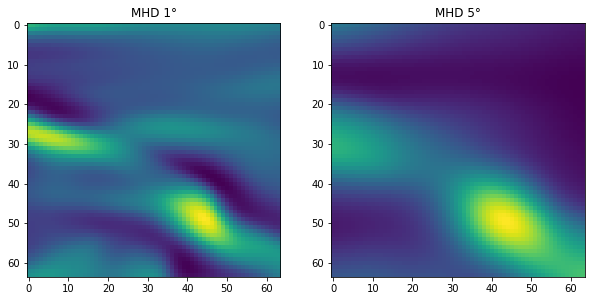

In [3]:
N = 42
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(mhd1[N]/mhd5[N])
plt.title('MHD 1°')
plt.subplot(122)
plt.imshow(mhd5[N])
plt.title('MHD 5°')

In [4]:
dcgan = DCGAN(output_directory='/global/homes/k/krach/scratch/NNforFG/DCGAN/tests/MHD/', img_size=(64, 64))

In [5]:
dir_models = '//global/homes/k/krach/scratch/NNforFG/DCGAN/tests/MHD/models/'
dcgan.discriminator = load_model(dir_models+'discrim_99999.h5')
dcgan.generator = load_model(dir_models+'generat_99999.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/usr/common/software/tensorflow/gpu-tensorflow/1.13.1-py36/lib/python3.6/site-packages/keras/engine/saving.py:327: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Text(0, 0.5, 'Discriminator accuracy')

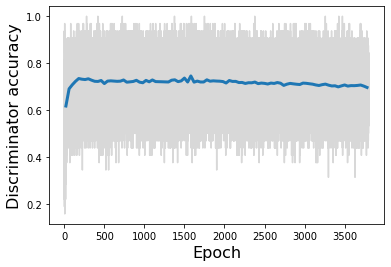

In [7]:
accs = np.load(dir_models+'acc_dreal_dfake_99999.npy')
data = (accs[:,1]+accs[:,0])/2.
x_binned, data_binned = bin_array(data, bins=1000)
plt.plot(np.arange(len(data))/25., data, color='grey', alpha=0.3)
plt.plot(x_binned/25, data_binned, lw=3)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Discriminator accuracy', fontsize=16)

In [8]:
training_path = '/global/homes/k/krach/scratch/NNforFG/training_set/'
training_file = 'training_set_MHDsims_1000patches_20x20deg_T_HR1deg_LR5deg_Npix64.npy'
X_train, X_test, Y_train, Y_test = load_training_set(training_path+training_file)
gen_imgs_test = dcgan.generator.predict(X_test)
gen_imgs_train = dcgan.generator.predict(X_train)

Text(0.5, 1.0, 'MHD 5°')

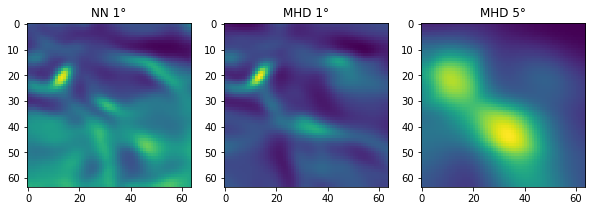

In [27]:
N = 24
vminm = np.min(Y_train[N, :, :, 0])
vmaxm = np.max(Y_train[N, :, :, 0])
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(gen_imgs_train[N, :, :, 0], vmin=vminm, vmax=vmaxm)
plt.title('NN 1°')
plt.subplot(132)
plt.imshow(Y_train[N, :, :, 0], vmin=vminm, vmax=vmaxm)
plt.title('MHD 1°')
plt.subplot(133)
plt.imshow(X_train[N, :, :, 0])
plt.title('MHD 5°')

### 